Download the dataset from the link below:
    https://www.kaggle.com/rakannimer/air-passenger-prediction

In [1]:
kaggle kernels output rakannimer/air-passenger-prediction -p /path/to/dest

SyntaxError: invalid syntax (Temp/ipykernel_12852/1964479093.py, line 1)

#### importing the dataset

In [2]:
#read the dataset
data=pd.read_csv(r'air_passengers.csv')

In [3]:
#check the first 5 rows of data
data.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
#checking the shape of data
data.shape

(144, 2)

#### Taking care of Missing data

In [5]:
#checking the null values
data.isnull().any()

ds    False
y     False
dtype: bool

In [6]:
#rename the #passengers column name
data.rename(columns={"#Passengers": "Passengers"},inplace=True)

In [7]:
data.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


#### Data Visualization

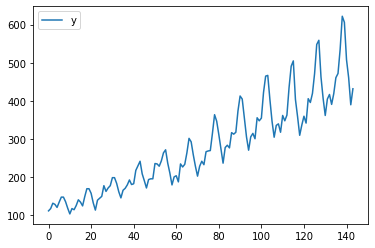

In [8]:
#We can plot the data easily in Pandas by calling the plot() function on the DataFrame.
import matplotlib.pyplot as plt
data.plot()
plt.show()

In [9]:
import datetime

In [10]:
data['ds']=pd.to_datetime(data['ds'], format='%Y-%m')

In [11]:
data.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [12]:
data.shape

(144, 2)

#### Forecast airline passengers traffic flow With Prophet

In [13]:
#import datetime conversion
from pandas import to_datetime
#prepare expected column names
data.columns = ['ds', 'y']
data['ds']= to_datetime(data['ds'])

In [14]:
data.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


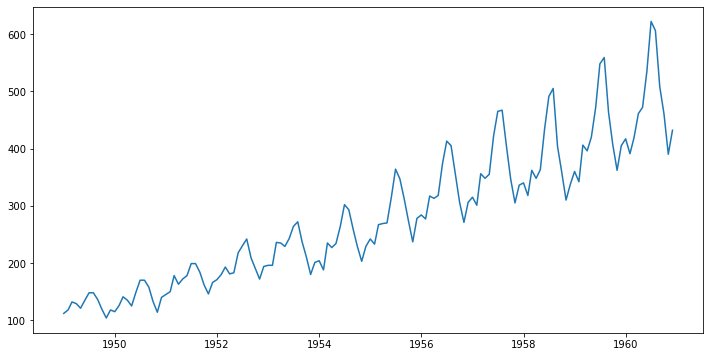

In [15]:
#visualizing the ds column
#configure the figure size
plt.figure(figsize=(12,6))
plt.plot(data.set_index(['ds']))

#### Model Building

In [16]:
#fit prophet model on the dataset

#import Prophet library from fbprophet
from fbprophet import Prophet
# define the model
model = Prophet()
# fit the model
model.fit(data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#### Prediction

In [17]:
future_prediction = model.make_future_dataframe(periods=365,freq="D")
future_prediction.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


#### Obtaining the forecastes

In [18]:
forecast=model.predict(future_prediction)

In [19]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.320611,55.027076,112.928949,106.320611,106.320611,-21.941934,-21.941934,-21.941934,-21.941934,-21.941934,-21.941934,0.0,0.0,0.0,84.378677
1,1949-02-01,108.500995,48.669996,105.521233,108.500995,108.500995,-30.714169,-30.714169,-30.714169,-30.714169,-30.714169,-30.714169,0.0,0.0,0.0,77.786826
2,1949-03-01,110.470374,82.266006,140.479290,110.470374,110.470374,-0.475833,-0.475833,-0.475833,-0.475833,-0.475833,-0.475833,0.0,0.0,0.0,109.994541
3,1949-04-01,112.650758,80.922299,135.658140,112.650758,112.650758,-5.203855,-5.203855,-5.203855,-5.203855,-5.203855,-5.203855,0.0,0.0,0.0,107.446903
4,1949-05-01,114.760808,82.740101,141.197805,114.760808,114.760808,-3.825854,-3.825854,-3.825854,-3.825854,-3.825854,-3.825854,0.0,0.0,0.0,110.934953


#### summarize the forecast

In [20]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds        yhat  yhat_lower  yhat_upper
0 1949-01-01   84.378677   55.027076  112.928949
1 1949-02-01   77.786826   48.669996  105.521233
2 1949-03-01  109.994541   82.266006  140.479290
3 1949-04-01  107.446903   80.922299  135.658140
4 1949-05-01  110.934953   82.740101  141.197805


#### plot forecast

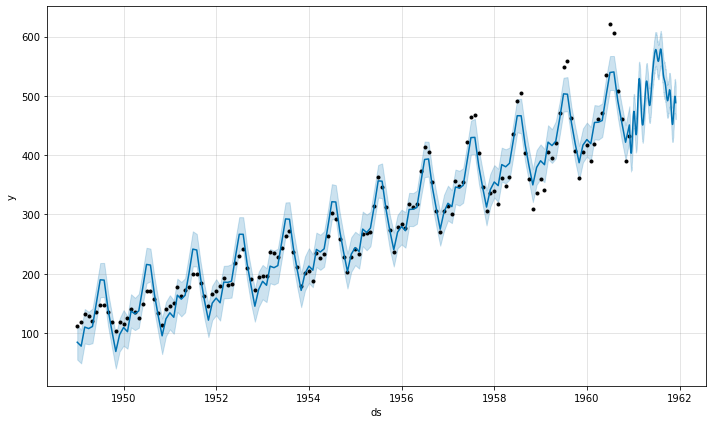

In [21]:
model.plot(forecast)
plt.show()

#### plotting the forecast components

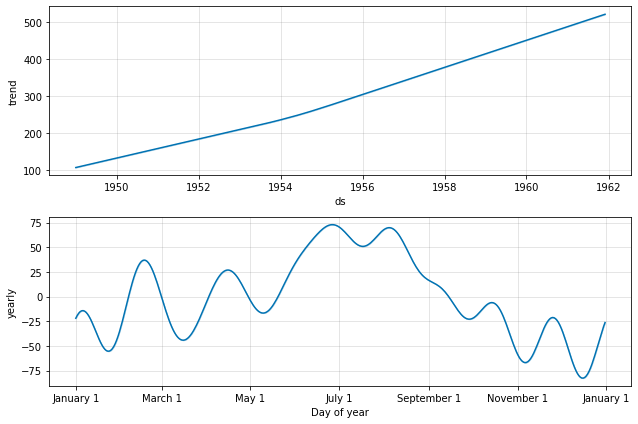

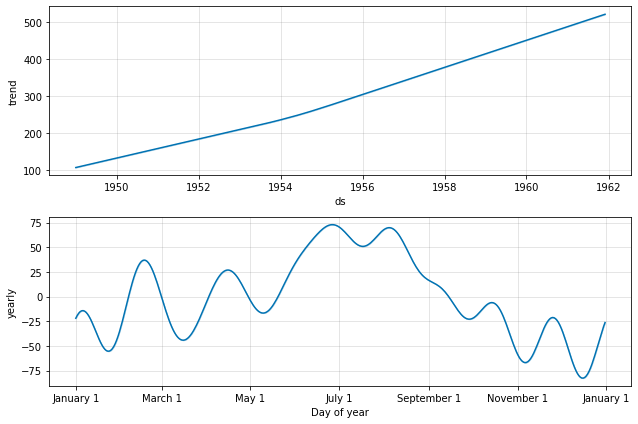

In [22]:
model.plot_components(forecast)

#### Cross Validation

In [23]:
from fbprophet.diagnostics import cross_validation

In [24]:
cv = cross_validation(model,initial = '530 days',period='180 days',horizon = '365 days')
cv

INFO:fbprophet:Making 20 forecasts with cutoffs between 1950-07-22 00:00:00 and 1959-12-02 00:00:00


  0%|          | 0/20 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1950-08-01,139.839784,139.790153,139.892472,170,1950-07-22
1,1950-09-01,159.165459,158.987794,159.351082,158,1950-07-22
2,1950-10-01,144.442711,144.123992,144.797710,133,1950-07-22
3,1950-11-01,77.628694,77.099854,78.190573,114,1950-07-22
4,1950-12-01,158.918801,158.192060,159.703779,140,1950-07-22
...,...,...,...,...,...,...
235,1960-08-01,527.079522,500.335270,551.286444,606,1959-12-02
236,1960-09-01,485.869209,459.554576,509.775984,508,1959-12-02
237,1960-10-01,452.202363,427.516040,480.084852,461,1959-12-02
238,1960-11-01,422.372655,395.932617,446.236512,390,1959-12-02


#### Evaluation of Model

In [25]:
from fbprophet.diagnostics import performance_metrics
pm=performance_metrics(cv)
pm.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,41 days,1033.442083,32.147194,25.009051,0.079593,0.073811,0.208333
1,42 days,966.621945,31.090544,24.495749,0.078513,0.073811,0.166667
2,46 days,989.559780,31.457269,25.324207,0.079409,0.084098,0.125000
3,47 days,959.568402,30.976901,25.065133,0.078142,0.084098,0.125000
4,48 days,957.810331,30.948511,24.867530,0.076697,0.084098,0.166667


#### Visualizing the performance Metrics

C:\Users\HP\anaconda3\envs\tf1\lib\site-packages\fbprophet\plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\HP\anaconda3\envs\tf1\lib\site-packages\fbprophet\plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


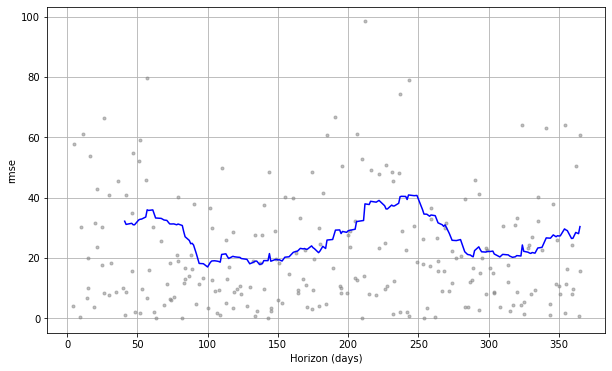

In [26]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(cv,metric='rmse')

#### Save the Model

In [27]:
#import pickle
import pickle
pickle.dump(model,open('airpassengers.pkl','wb'))